# Super-Host

In [21]:
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression

# Run dataprocessing Notebook
%run dataprocessing.ipynb

# Select relavent features for analysis
selected_vars = [ 'experiences_offered',
       'transit', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'market', 
       'zipcode', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'has_availability',
       'number_of_reviews',
       'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'requires_license', 
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture',
       'require_guest_phone_verification',
       'reviews_per_month']

There are many features that are just informative in nature. To reduce the dimentianllity let us remove such columns from the data.

In [22]:
listing_df= pd.read_csv('..//data//listings.csv')
X,y = data_wrangling(listing_df,selected_vars,'host_is_superhost')


Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'Facilities',
       'Host_experience'],
      dtype='object')
Index(['zipcode', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy'],
      dtype='object')


In [23]:


#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

# normalise data
scaler = Normalizer().fit(X_train)
norm_x_train = scaler.transform(X_train)
norm_x_test = scaler.transform(X_test)

#fit the model and obtain pred response
#lm_model = LinearRegression(normalize=True)
lm_model = LogisticRegression()
#lm_model = RandomForestRegressor(max_depth=5, n_estimators=100,random_state=False, verbose=False)
lm_model.fit(norm_x_train, y_train)
y_test_preds = lm_model.predict(norm_x_test)
y_train_preds = lm_model.predict(norm_x_train)

#append the r2 value from the test set
#r2_scores_test= (r2_score(y_test, y_test_preds))
#r2_scores_train= (r2_score(y_train, y_train_preds))
#results= r2_score(y_test, y_test_preds)
results = lm_model.score(norm_x_test, y_test)

/home/dev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
print(results)

0.7722513089005235


In [26]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(5)

,est_int,coefs,abs_coefs
18,number_of_reviews,4.504618,4.504618
1,host_acceptance_rate,3.286229,3.286229
31,Facilities,2.729598,2.729598
0,host_response_rate,2.635725,2.635725
32,Host_experience,1.626755,1.626755


In [54]:
import seaborn as sns

def plot_diff(var):

    #Step 1 - Prepare Data
    data_super = X[y]
    data_no_super = X[~y]

    #Step 2 - Create Plot
    fig = plt.figure()

    #Step 3 - Plot
    ax = fig.add_subplot(311)

    #Step 4 - Customize plot
    sns.distplot(data_super[var])
    plt.title(var + ' distribution for Super-Hosts')
    print(data_super[var].describe())

    ax = fig.add_subplot(313)

    #Step 4 - Customize plot
    sns.distplot(data_no_super[var])
    plt.title(var + ' distribution for Non Super-Hosts')
    print(data_no_super[var].describe())

    #Step 5 - plt.show()
    plt.show()
    


count    780.000000
mean      93.333333
std       24.960388
min        0.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: host_acceptance_rate, dtype: float64
count    3038.000000
mean       76.234365
std        42.571759
min         0.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: host_acceptance_rate, dtype: float64


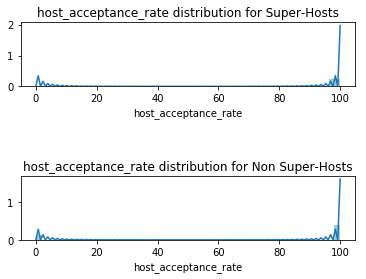

In [55]:
plot_diff('host_acceptance_rate')

count    780.000000
mean     215.524359
std       70.023749
min        2.000000
25%      166.000000
50%      212.000000
75%      257.000000
max      404.000000
Name: Facilities, dtype: float64
count    3038.000000
mean      196.089862
std        70.408345
min         2.000000
25%       151.000000
50%       194.000000
75%       241.000000
max       457.000000
Name: Facilities, dtype: float64


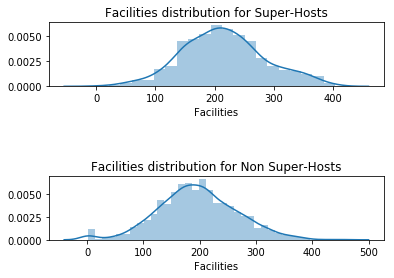

In [56]:
plot_diff('Facilities')

count    780.000000
mean      93.853846
std       21.178238
min        0.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: host_response_rate, dtype: float64
count    3038.000000
mean       78.816985
std        36.463396
min         0.000000
25%        80.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: host_response_rate, dtype: float64


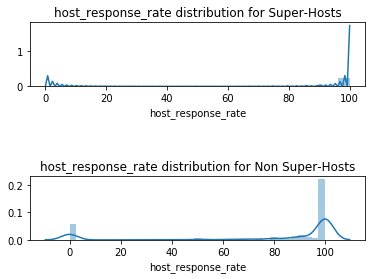

In [57]:
plot_diff('host_response_rate')

count     780.000000
mean      901.687881
std       505.256464
min       131.000000
25%       510.750000
50%       850.500000
75%      1236.250000
max      2549.000000
Name: Host_experience, dtype: float64
count    3038.000000
mean      816.965109
std       583.857408
min        -2.000000
25%       318.250000
50%       707.500000
75%      1232.000000
max      2608.000000
Name: Host_experience, dtype: float64


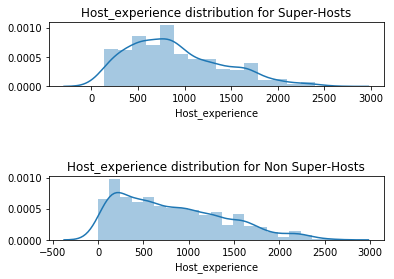

In [58]:
plot_diff('Host_experience')

count    780.000000
mean      41.650000
std       46.030651
min        0.000000
25%       13.000000
50%       28.000000
75%       51.250000
max      404.000000
Name: number_of_reviews, dtype: float64
count    3038.000000
mean       17.235681
std        33.525448
min         0.000000
25%         1.000000
50%         6.000000
75%        18.000000
max       474.000000
Name: number_of_reviews, dtype: float64


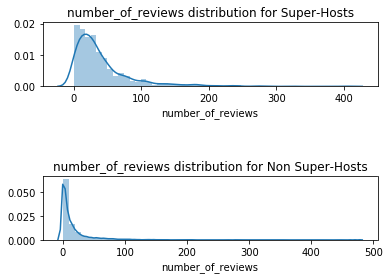

In [59]:
plot_diff('number_of_reviews')

# Results

1. number_of_reviews
2. host_acceptance_rate  
3. Facilities
4. host_response_rate
5. Host_experience  